In [2]:
import cv2
import numpy as np
import datetime
from matplotlib import pyplot as plt

print(cv2.__version__)

4.5.1


()
()
()
()
()
()
()
()
()
()
()
()
[[0]]
[[0]]
[[0]]
()
[[0]]
[[0]]
[[1]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[1]]
()
()
()
()
()
()
()
()


KeyboardInterrupt: 

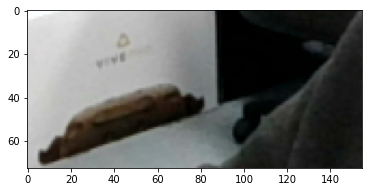

In [3]:
cap = cv2.VideoCapture(0)
whT = 320
confThreshold = 0.5
nmsThreshold = 0.3

classesFile = 'obj.names'
classNames = []

with open(classesFile, 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')
    
#print(classNames)
#print(len(classNames))

modelConfiguration= 'yolov3_ED.cfg'
modelWeights= 'yolov3_best.weights'

net = cv2.dnn.readNetFromDarknet(modelConfiguration,modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

def findObjects(outputs,img):
    hT, wT, cT, = img.shape
    bbox= []
    classIds = []
    confs = []
 #   now = datetime.datetime.now().strftime("%d_%H_%M_%S")
 #   frame= cap.read()
    
    for output in outputs:
        for det in output:
            scores = det[5:]
            classId= np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                w,h = int(det[2]*wT), int(det[3]*hT)
                x,y = int((det[0]*wT)-w/2), int((det[1]*hT)-h/2)
                bbox.append([x,y,w,h])
                classIds.append(classId)
                confs.append(float(confidence))
    #print(len(bbox))
    indices = cv2.dnn.NMSBoxes(bbox,confs,confThreshold,nmsThreshold)
    print(indices)
    for i in indices:
        i = i[0]
        box = bbox[i]
        x,y,w,h = box[0],box[1],box[2],box[3]
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
        cv2.putText(img,f'{classNames[classIds[i]].upper()} {int(confs[i]*100)}%', (x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,0,255),2)
        #ED_pic = frame[x:x+h, y:y+w]
       # plt.imshow(ED_pic)
       # plt.show
       
        #print(classNames[classIds[i]].upper())
        if indices == [[0]]:
            ret,frame = cap.read()
            ED_pic = frame[x:x+h, y:y+w]
            plt.imshow(ED_pic)
            plt.show

while True:
    success, img = cap.read()
    
    blob = cv2.dnn.blobFromImage(img,1/255,(whT,whT),[0,0,0],1,crop=False)
    net.setInput(blob)
    
    layerNames = net.getLayerNames()
   # print(layerNames)
    outputNames = [layerNames[i[0]-1] for i in net.getUnconnectedOutLayers()]
    #print(outputNames) 
   # print(net.getUnconnectedOutLayers())

    outputs = net.forward(outputNames)
    #print(outputs[0].shape)
    #print(outputs[1].shape)
    #print(outputs[2].shape)
    #print(outputs[0][0])
    
    findObjects(outputs,img)
    
    cv2.imshow('Img',img)
    cv2.waitKey(1)
    

# 